In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [282]:
## Read the dataset
df = pd.read_csv('Height-weight.csv')

In [284]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

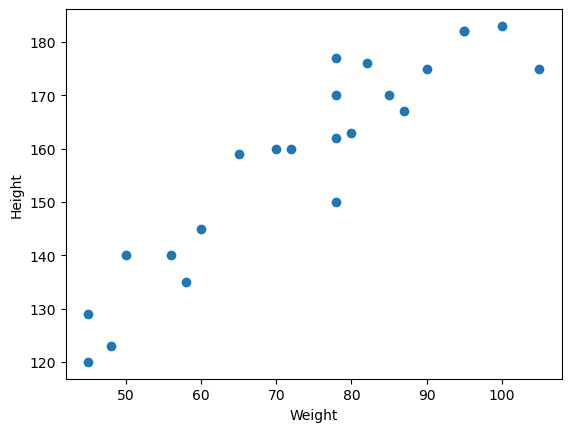

In [286]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [287]:
## Divide the dataset into independent and dependent features 
X = df[['Weight']] # Independent features
y = df['Height'] # Dependent features

In [290]:
from sklearn.model_selection import train_test_split

In [292]:
## Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [294]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [296]:
## Standardizig the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [298]:
scaler = StandardScaler()

In [300]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

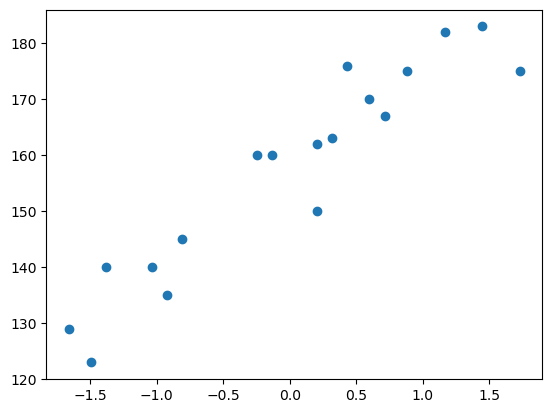

In [302]:
plt.scatter(X_train, y_train)

In [304]:
## Train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [306]:
regressor = LinearRegression()

In [308]:
regressor.fit(X_train,y_train)

LinearRegression()

In [310]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("The intercept is: ",regressor.intercept_)

The slope or coefficient of weight is  [16.9712312]
The intercept is:  157.5


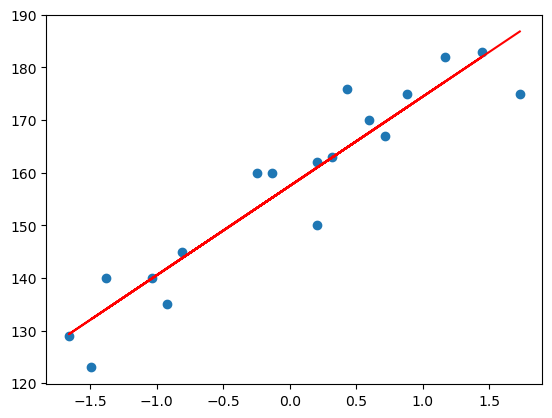

In [312]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### Prediction of train data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 16.9(X_train)

### Prediction of test data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 16.9(X_test)

In [315]:
y_pred_test = regressor.predict(X_test)

In [317]:
y_pred_test,y_test

(array([160.96149112, 160.96149112, 129.32878763, 177.25712626,
        148.50012308]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

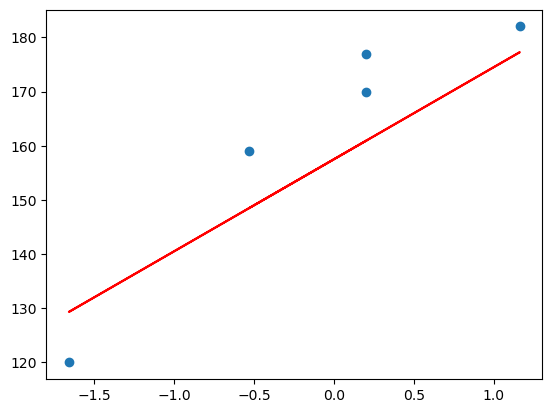

In [319]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrices
## MSE, MAE, RMSE
## R squared and adjusted R square

In [322]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [324]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

111.73939098567298
9.929711208042454
10.570685454863984


## R square
### Formula:
## R^2 = 1-SSR/SST
### R^2 = coefficient of determination SSR - sum of squares of residuals SST = total sum of squares

In [327]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [329]:
score

0.7729981493058813

## Adjusted R Square
### Adjusted R2 = 1+[(1-R2)*(n-1)/(n-k-1))
#### where:
#### R2: The R2 of the model n: The number of observations k: The number of predictor values

In [332]:
## Display the adjusted R-squared value
1 - (1 - score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)

0.697330865741175

In [334]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\psudi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.31692601]])

In [336]:
scaled_weight[0]

array([0.31692601])

In [338]:
print("The height prediction for weight of 80 Kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight of 80 Kg is : [162.87862467]


## Assumptions requrired to draw conclusions for the model

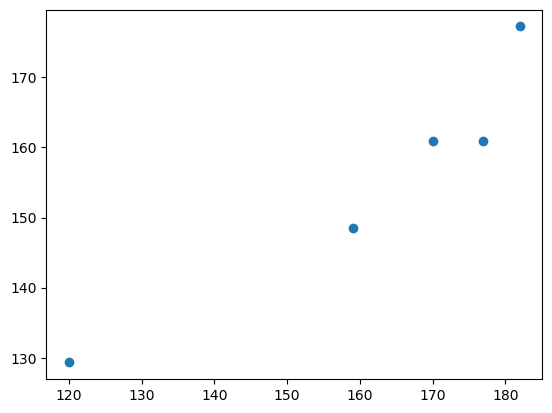

In [341]:
## Plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test) ##the output of this should be linear

In [343]:
## Residuals
residuals = y_test - y_pred_test
residuals

15    16.038509
9      9.038509
0     -9.328788
8      4.742874
17    10.499877
Name: Height, dtype: float64

C:\Users\psudi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


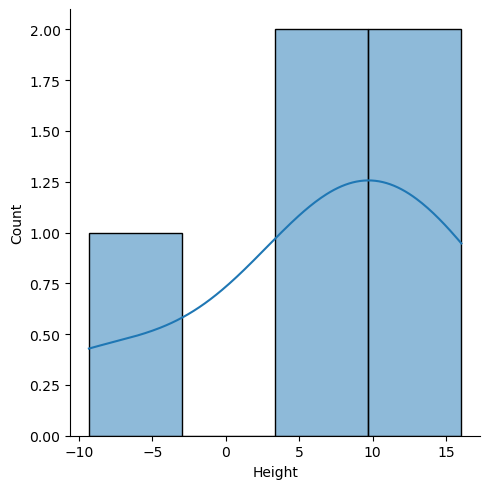

In [344]:
## Plot the residuals
import seaborn as sns
sns.displot(residuals,kde=True)

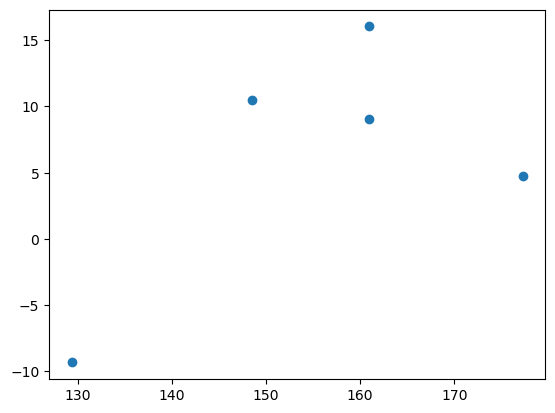

In [350]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred_test,residuals) # output should be uniformly distributes